# 

# 

# Dog Vs Cat Image Classification

### Project Objective:

The main objective of this deep learning project is to develop a predictive model capable of accurately classifying images of animals as either cats or dogs. Leveraging deep learning algorithms, we aim to create a robust and efficient system that can automatically recognize and categorize these common animal species based on visual characteristics.

# 

### Importing Packages

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.12.0'

# 

### Passing Arguments

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# 

### Preprocessing the Training set

In [4]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


# 

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# 

### Checking Classes

In [7]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1])

# 

### Checking Encodes

In [9]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

# 

### Initialising the CNN

In [10]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 29, 29, 64)       256       
 chNormalization)                                                
                                                      

# 

### Compiling the CNN

In [82]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# 

### Training the CNN on the Training set and evaluating it on the Test set

In [83]:
r = model.fit(training_set,epochs=15,validation_data=test_set)

Epoch 1/15
250/250 [==============================] - 59s 228ms/step - loss: 0.6664 - accuracy: 0.6161 - val_loss: 0.8438 - val_accuracy: 0.5000
Epoch 2/15
250/250 [==============================] - 58s 230ms/step - loss: 0.5665 - accuracy: 0.7055 - val_loss: 0.5804 - val_accuracy: 0.6995
Epoch 3/15
250/250 [==============================] - 57s 230ms/step - loss: 0.5216 - accuracy: 0.7345 - val_loss: 0.5030 - val_accuracy: 0.7545
Epoch 4/15
250/250 [==============================] - 58s 232ms/step - loss: 0.4788 - accuracy: 0.7701 - val_loss: 0.4562 - val_accuracy: 0.7845
Epoch 5/15
250/250 [==============================] - 59s 236ms/step - loss: 0.4334 - accuracy: 0.8015 - val_loss: 0.5214 - val_accuracy: 0.7375
Epoch 6/15
250/250 [==============================] - 58s 234ms/step - loss: 0.4105 - accuracy: 0.8090 - val_loss: 0.4770 - val_accuracy: 0.7635
Epoch 7/15
250/250 [==============================] - 59s 235ms/step - loss: 0.3876 - accuracy: 0.8245 - val_loss: 0.4421 - val_ac

# 

### Plot loss per iteration

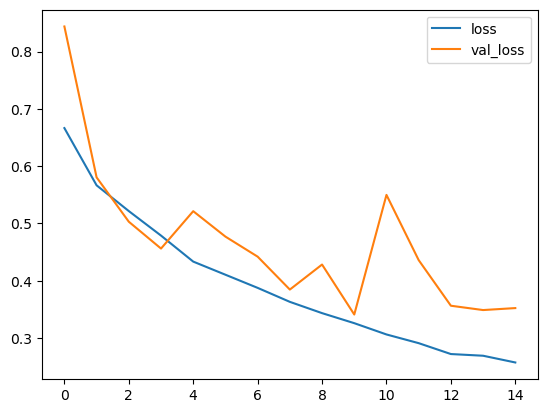

In [84]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss') 
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# 

### Plot accuracy per iteration

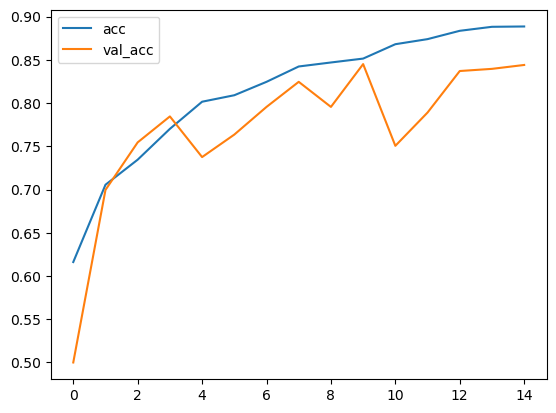

In [85]:
plt.plot(r.history['accuracy'], label='acc') 
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# 

### Evaluate the model

In [86]:
model.evaluate(test_set)

63/63 [==============================] - 6s 89ms/step - loss: 0.3523 - accuracy: 0.8440


[0.3522926867008209, 0.843999981880188]

# 

### Making a single prediction

In [118]:
import cv2 
def analyze_image(test_img):
    plt.imshow(test_img)
    print(test_img.shape)
    test_img = cv2.resize(test_img,(64,64))
    test_input = test_img.reshape((1,64,64,3))
    print(model.predict(test_input))

(720, 960, 3)
1/1 [==============================] - 0s 21ms/step
[[1.]]


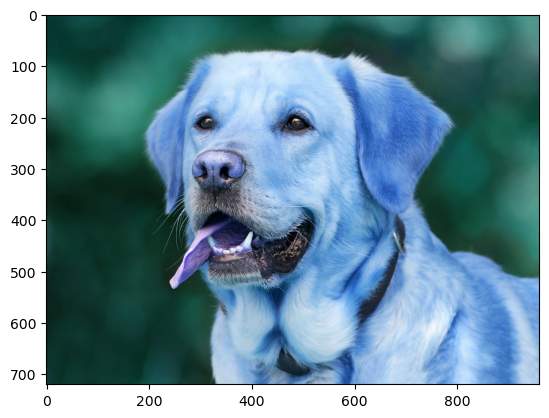

In [119]:
test_img = cv2.imread('dataset/single_prediction/cat_or_dog_1.jpg')
analyze_image(test_img)

# 

(1600, 2560, 3)
1/1 [==============================] - 0s 16ms/step
[[0.]]


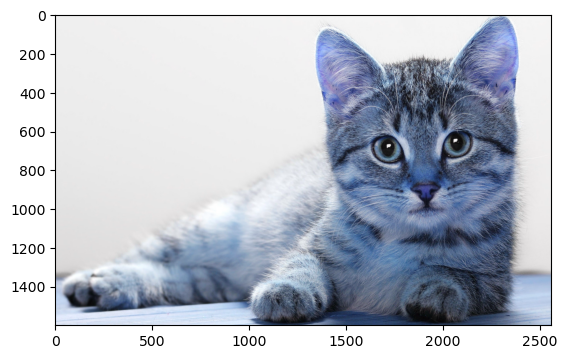

In [120]:
test_img = cv2.imread('dataset/single_prediction/cat_or_dog_2.jpg')
analyze_image(test_img)

# 

# 